In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('bmh')

plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['legend.fontsize'] = 20
plt.rcParams["axes.titlesize"] = 24
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["figure.titlesize"] = 24
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 16

In [2]:
beta = 8
gamma = 1/2
u_max = 20
rho_max = 1/7.5
c = 0.078 * u_max * rho_max
b = 1/3
l = 1/10

# Función g
def g(y, b, l):
    output = np.sqrt(1 + ((y-b)/l)**2)
    return output

# Diagrama fundamental
def Q_e(rho, c, b, l):
    output = c * (g(0, b, l) + (((g(1, b, l) - g(0, b, l)) * rho/rho_max)) - g(rho/rho_max, b, l))
    return output

# Df Greenshilds
def Q_e_2(rho):
    output = u_max * (rho - ((rho**2)/rho_max))
    return output

# DF Newell-Daganzo
def Q_e_3(rho):
    rho_c = rho_max/3
    Q_max = u_max * rho_c
    
    if rho<=rho_c:
        return Q_max * rho / rho_c

    else:
        return Q_max * (rho_max - rho)/(rho_max - rho_c)
Q_e_3 = np.vectorize(Q_e_3)

# DF bicuadratico
def Q_e_4(rho):
    rho_c = rho_max/3
    Q_max = 0.741967464251931 #u_max * rho_c
    V_c = 16.694267945668447
    
    if rho<rho_c:
        return rho * (u_max - (rho/rho_c * (u_max - V_c)))

    else:
        W_max = 10.34001731297745
        alpha = (Q_max/((rho_max - rho_c)**2)) - (W_max/(rho_max - rho_c))
        return W_max * (rho_max - rho) + alpha * (rho_max - rho)**2
Q_e_4 = np.vectorize(Q_e_4)

In [7]:
df = pd.read_csv("data_DF.csv")
df = df.loc[:, df.any()]
df = df.rename(columns=df.iloc[0])

In [8]:
densidad = df.filter(regex='Density')
densidad.columns = densidad.iloc[1]
densidad = densidad.drop([0, 1])
flujo = df.filter(regex='Flow')
flujo.columns = flujo.iloc[1]
flujo = flujo.drop([0, 1])

In [9]:
densidades = np.zeros(0)
flujos = np.zeros(0)

for column in densidad:
    rho = densidad[column].to_numpy(dtype=float)
    flow = flujo[column].to_numpy(dtype=float)
    
    densidades = np.append(densidades, rho)
    flujos = np.append(flujos, flow)

In [10]:
densidades = densidades * 0.00062137

In [11]:
flujos = flujos/3600

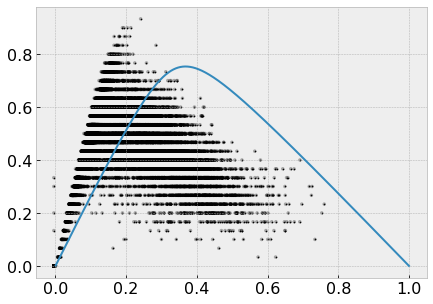

In [12]:
plt.scatter(densidades/rho_max, flujos, marker=".", c="black", alpha=1, s=5)
plt.scatter(densidades/rho_max, flujos, marker=".", c="black", alpha=0.3, s=50, edgecolor="none")

rhos = np.linspace(1e-4, rho_max-1e-5, 100_000)
plt.plot(rhos/rho_max, Q_e(rhos, c, b, l))
plt.show()

In [13]:
densidades

array([0.00791925, 0.0052795 , 0.0104333 , ..., 0.0282202 , 0.05926871,
       0.03739648])

In [14]:
density_244_1 = density_244["244"].to_numpy(dtype=float)
density_244_2 = density_244["244.1"].to_numpy(dtype=float)
density_244_3 = density_244["244.2"].to_numpy(dtype=float)

flow_244_1 = flow_244["244.8"].to_numpy(dtype=float)
flow_244_2 = flow_244["244.9"].to_numpy(dtype=float)
flow_244_3 = flow_244["244.10"].to_numpy(dtype=float)

NameError: name 'density_244' is not defined

In [16]:
density_245_1 = density_245["245"].to_numpy(dtype=float)
density_245_2 = density_245["245.1"].to_numpy(dtype=float)
density_245_3 = density_245["245.2"].to_numpy(dtype=float)

flow_245_1 = flow_245["245.8"].to_numpy(dtype=float)
flow_245_2 = flow_245["245.9"].to_numpy(dtype=float)
flow_245_3 = flow_245["245.10"].to_numpy(dtype=float)

NameError: name 'density_245' is not defined

In [17]:
density_582_1 = density_582["582"].to_numpy(dtype=float)
density_582_2 = density_582["582.1"].to_numpy(dtype=float)
density_582_3 = density_582["582.2"].to_numpy(dtype=float)

flow_582_1 = flow_582["582.8"].to_numpy(dtype=float)
flow_582_2 = flow_582["582.9"].to_numpy(dtype=float)
flow_582_3 = flow_582["582.10"].to_numpy(dtype=float)

NameError: name 'density_582' is not defined

NameError: name 'density_245_1' is not defined

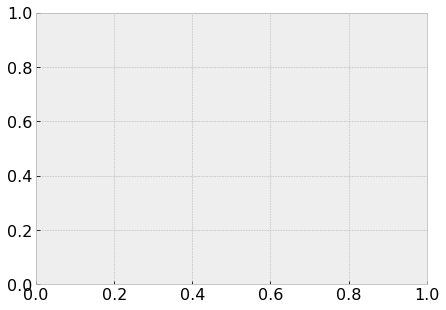

In [15]:

#plt.plot(density_244_1, flow_244_1, ".", color="black")
#plt.plot(density_244_2, flow_244_2, ".", color="black")
#plt.plot(density_244_3, flow_244_3, ".", color="black")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


ax.scatter(density_245_1/np.max(density_245_1), flow_245_1/np.max(flow_245_1), marker=".", 
         c="black", alpha=1, s=5)
ax.scatter(density_245_1/np.max(density_245_1), flow_245_1/np.max(flow_245_1), marker=".", 
         c="black", alpha=0.3, s=50, edgecolor="none")

ax.scatter(density_245_2/np.max(density_245_2), flow_245_2/np.max(flow_245_2), marker=".", 
         c="black", alpha=1, s=5)
ax.scatter(density_245_2/np.max(density_245_2), flow_245_2/np.max(flow_245_2), marker=".", 
         c="black", alpha=0.3, s=50, edgecolor="none")

ax.scatter(density_245_3/np.max(density_245_3), flow_245_3/np.max(flow_245_3), marker=".", 
         c="black", alpha=1, s=5)
ax.scatter(density_245_3/np.max(density_245_3), flow_245_3/np.max(flow_245_3), marker=".", 
         c="black", alpha=0.3, s=50, edgecolor="none")


    
#plt.plot(density_245_2, flow_245_2, ".", color="black")
#plt.plot(density_245_3/np.max(density_245_3), flow_245_3/np.max(flow_245_3), ".", color="black", alpha=0.5)

#plt.plot(density_582_1, flow_582_1, ".", color="black")
#plt.plot(density_582_2, flow_582_2, ".", color="black")
#plt.plot(density_582_3, flow_582_3, ".", color="black")
plt.xlim(0, 1)
plt.xlabel(r"$\rho/\rho_{\max}$")
plt.ylabel("Tasa de flujo")
plt.title("Diagrama fundamental")
plt.grid()
#plt.savefig("hola.png", dpi=300)
plt.show()

In [294]:
df_2 = pd.read_csv("otro.csv")
df_2 = df_2.loc[:, df_2.any()]
df_2 = df_2.drop([0, 1])
df_2

,,199,199.1,200,200.1,201,201.1,202,202.1
2,6:00:30 AM,2.2116401,240.0,11.611111,840.0,21.12,840.0,15.569231,960.0
3,6:01 AM,3.8412697,360.0,12.711111,840.0,13.004444,960.0,11.846153,840.0
4,6:01:30 AM,3.4920633,360.0,11.366666,840.0,6.942222,480.0,6.54359,480.0
5,6:02 AM,1.2804233,120.0,8.555556,600.0,17.208889,1200.0,18.389744,960.0
6,6:02:30 AM,0.0,0.0,1.8333333,120.0,7.7244444,480.0,10.379487,720.0
...,...,...,...,...,...,...,...,...,...
1917,9:58 PM,8.613756,600.0,20.044443,1320.0,12.515555,960.0,12.184615,840.0
1918,9:58:30 PM,12.338624,960.0,14.177778,960.0,13.3955555,1080.0,9.589744,720.0
1919,9:59 PM,6.7513227,480.0,19.066666,1320.0,17.013334,1320.0,13.989743,960.0
1920,9:59:30 PM,12.222221,1080.0,19.677778,1440.0,24.24889,1560.0,20.646154,1200.0


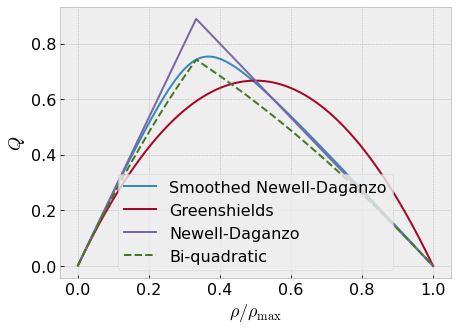

In [3]:
#awa = df_2["199"].to_numpy(dtype=float)
#ewe = df_2["199.1"].to_numpy(dtype=float)

#twt = df_2["200"].to_numpy(dtype=float)
#nwn = df_2["200.1"].to_numpy(dtype=float)

#iwi = df_2["201"].to_numpy(dtype=float)
#owo = df_2["201.1"].to_numpy(dtype=float)

#plt.scatter(awa/np.max(awa), ewe/np.max(ewe), marker=".", 
         #c="black", alpha=1, s=5)
#plt.scatter(awa/np.max(awa), ewe/np.max(ewe), marker=".", 
         #c="black", alpha=0.3, s=50, edgecolor="none")
#plt.scatter(twt/np.max(twt), nwn/np.max(nwn))
#plt.scatter(iwi/np.max(iwi), owo/np.max(owo))
rhos = np.linspace(1e-4, rho_max-1e-5, 100_000)
plt.plot(rhos/rho_max, Q_e(rhos, c, b, l), label="Smoothed Newell-Daganzo")
plt.plot(rhos/rho_max, Q_e_2(rhos), label="Greenshields")
plt.plot(rhos/rho_max, Q_e_3(rhos), label="Newell-Daganzo")
plt.plot(rhos/rho_max, Q_e_4(rhos), label="Bi-quadratic", ls="--")
plt.xlabel(r"$\rho/\rho_{\max}$")
plt.ylabel(r"$Q$")
#plt.title("FD comparison")
plt.legend(fontsize=16)
plt.savefig("Charts/DF/Comparacion_DFs_english.png", dpi=300, bbox_inches = "tight")
plt.show()

### Aproximacion de parámetros

In [400]:
density_values = np.append(density_245_1, density_245_3)
density_values = np.append(density_values, density_245_2)

flow_values = np.append(flow_245_1, flow_245_3)
flow_values = np.append(flow_values, flow_245_2)

In [729]:
def f(x):
    c = x[0]
    b = x[1]
    l = x[2]
    rho = densidades#density_values/np.max(density_values)
    Q = flujos#flow_values/np.max(flow_values)
    output = np.fabs(Q_e(rho, c, b, l) - Q)
    return output

In [743]:
from scipy.optimize import least_squares

res = least_squares(f, [c, b, l])
c_opt, b_opt, l_opt = res.x
c_opt, b_opt, l_opt

(0.03580352056842112, 0.11734502120225763, 0.013005155558890447)

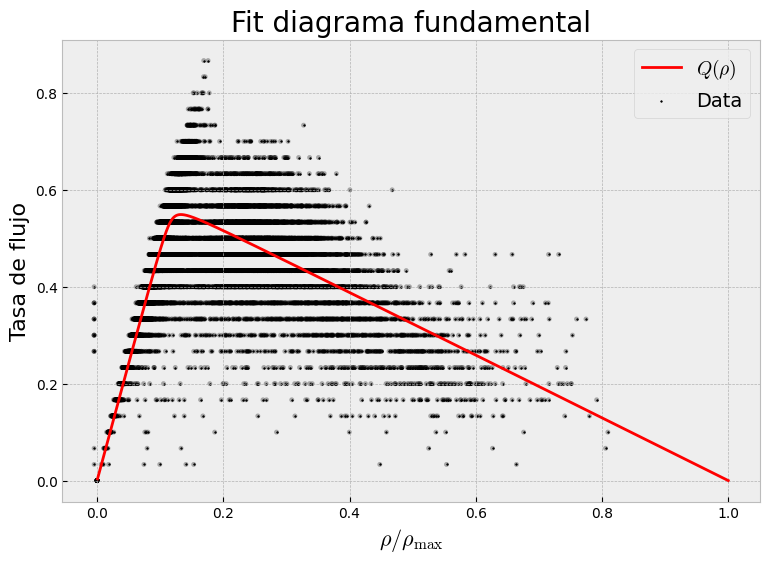

In [745]:
plt.scatter(densidades/rho_max, flujos, marker=".", 
         c="black", alpha=1, s=5, label="Data")
plt.scatter(densidades/rho_max, flujos, marker=".", 
         c="black", alpha=0.3, s=50, edgecolor="none")


plt.plot(rhos/rho_max, Q_e(rhos, c_opt, b_opt, l_opt), color="r", label=r"$Q(\rho)$")
plt.xlabel(r"$\rho/\rho_{\max}$")
plt.ylabel("Tasa de flujo")
plt.title("Fit diagrama fundamental")
plt.legend()
plt.savefig("fit_DF.png", dpi=300)
plt.show()

In [732]:
from scipy.optimize import fmin
rho_c = fmin(lambda rho: -Q_e(rho, c_opt, b_opt, l_opt), rho_max/6)[0]
u_max = Q_e(rho_c, c_opt, b_opt, l_opt)/rho_c
u_max

Optimization terminated successfully.
         Current function value: -0.548995
         Iterations: 8
         Function evaluations: 16


31.00207166165824

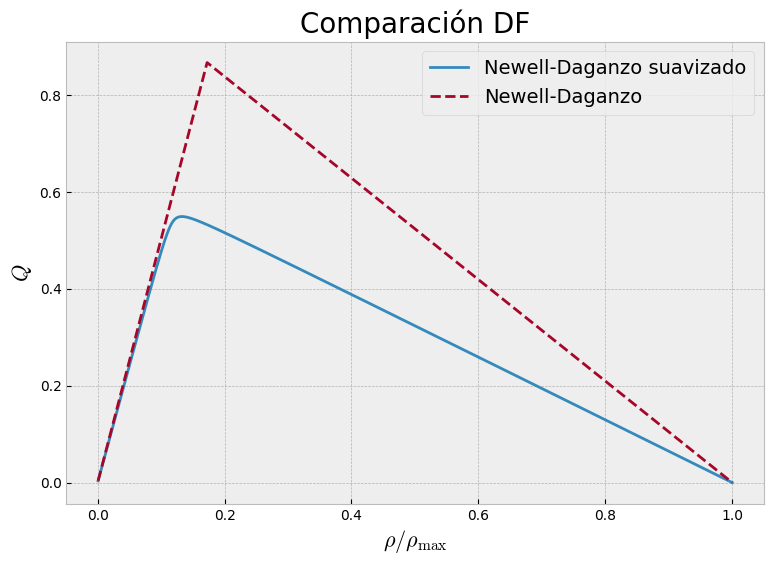

In [742]:
u_max = flujo_c/rho_c
rhos = np.linspace(1e-4, rho_max-1e-5, 100_000)
plt.plot(rhos/rho_max, Q_e(rhos, c_opt, b_opt, l_opt), label="Newell-Daganzo suavizado")
plt.plot(rhos/rho_max, Q_e_3(rhos, rho_c, u_max), ls="--", label="Newell-Daganzo")
plt.xlabel(r"$\rho/\rho_{\max}$")
plt.ylabel(r"$Q$")
plt.title("Comparación DF")
plt.legend()

#plt.savefig("Comparacion_DFs.png")
plt.show()

In [741]:
rho_c = np.mean(densidades[np.where(flujos==np.max(flujos))])
flujo_c = flujos[np.where(flujos==np.max(flujos))][0]

In [738]:
flujo_c/rho_c

37.68736566772649

In [740]:
flujo_c

0.8666666666666667